In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from time import time
import sys
sys.path.append('/Users/rossg/Work/nanoparticles/Analysis')
from AnalysisTools import *
import mdtraj as md
warnings.filterwarnings('ignore', category=DeprecationWarning, message='.*use @default decorator instead.*')
from mdtraj.geometry.sasa import _ATOMIC_RADII
# Below are taken from Bondi 1964, whereas the MdTraj defaults are taken from Gromacs radii.
_ATOMIC_RADII['Cl'] = 0.175
_ATOMIC_RADII['Br'] = 0.187
_ATOMIC_RADII['I'] = 0.204

In [2]:
# Nice colours, taken on 26th Nov 2015 from:
#http://tableaufriction.blogspot.co.uk/2012/11/finally-you-can-use-tableau-data-colors.html

# These are the "Tableau" colors as RGB. I've chosen my faves. 
# In order: blue, green, purple, orange, yellow. Hopefully a good compromise for colour-blind people.
tableau4 = [(31, 119, 180),(44, 160, 44),(148,103,189),(255, 127, 14),(188,189,34)]

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts. 
for i in range(len(tableau4)):    
    r, g, b = tableau4[i]    
    tableau4[i] = (r / 255., g / 255., b / 255.)

# Nanoparticle 10v (valrubicin)

### Surface area of unrestrained implicit solvent simulation
* Number of drug molecules = 50
* Number of dye molecules = 10
* Box dimensions = $161 \times 161 \times 161 \text{A}^3$
* Concentration of drug at experimental concentration of approximately 20mM.

Loading trajectory from  /Users/rossg/Work/my_nanoparticles/Production_Implicit_OBC1_longer/10v.

In [3]:
folder = '/Users/rossg/Work/my_nanoparticles/Production_Implicit_OBC1_longer/' + '10v/'
traj = md.load(folder+'trajectory.dcd',top=folder+'snapshots.pdb')

In [4]:
sasa = md.shrake_rupley(traj,mode = "residue")
total_sasa = sasa.sum(axis=1)

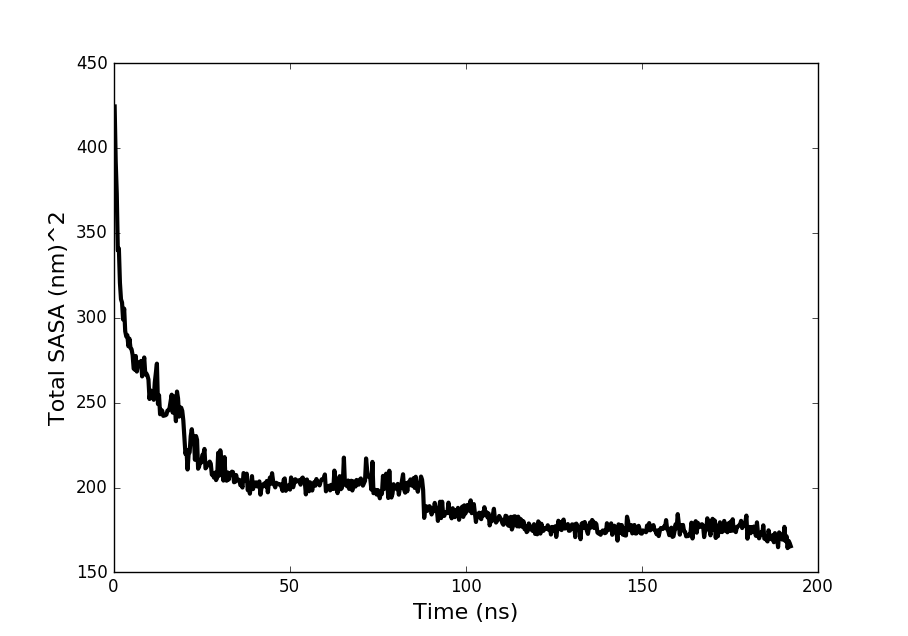

In [5]:
plt.figure(figsize=(10.0/1.1,7.0/1.1))

time = (np.arange(len(total_sasa))+1)*150000*0.002/1000
plt.plot(time,total_sasa,color='k',linewidth=3)
plt.xlim((0,200))
plt.xlabel('Time (ns)',size=16)
plt.ylabel('Total SASA (nm)^2', size=16)
#plt.grid()
#plt.figure(dpi=300)
plt.savefig("SASA_10v_unrestrained.png", format='png')
Image("SASA_10v_unrestrained.png")

## Surface area of 10v in explicit solvent
Nanoparticle formed in implicit solvent, then solvated in explicit solvent. 
* Number of drug molecules = 50
* Number of dye molecules = 20
* water model = TIP3P
* Box dimensions set so that water was at least 10 Angs from edge of nanoparticle

In [6]:
folder = '/Users/rossg/Work/nanoparticles/NewExplicit/Production/10v/'
traj_10v = md.load(folder+'traj_centered.dcd',top=folder+'equil.pdb')
#traj_implicit.remove_solvent(inplace=True)    # Still leaves ions

In [7]:
mols = ['LIG','DYE']
atmids = [atms.index for atms in traj_10v.topology.atoms if atms.residue.name in mols]
traj_10v = traj_10v.atom_slice(atmids,inplace=True)

In [8]:
sasa_10v = md.shrake_rupley(traj_10v,mode = "residue")
total_sasa_10v = sasa_10v.sum(axis=1)

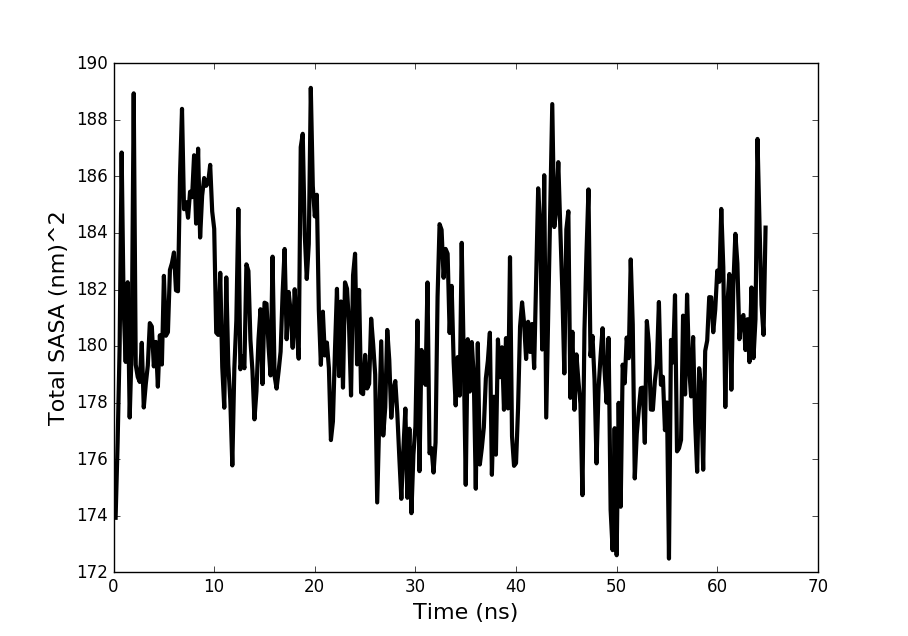

In [9]:
plt.clf()
time = (np.arange(len(total_sasa_10v))+1)*100000*0.002/1000     # Time in nanoseconds: 'nsteps_per_frame*time_step(ps)/num_ps_in_ns
plt.plot(time,total_sasa_10v,color='k',linewidth=3)
#plt.xlim((0,200))
plt.xlabel('Time (ns)',size=16)
plt.ylabel('Total SASA (nm)^2', size=16)
#plt.grid()
#plt.figure(dpi=300)
plt.savefig("SASA_10v_explicit.png", format='png')
Image("SASA_10v_explicit.png")

The nanoparticle formed in implicit solvent has an approximately stable (albeit variable) SASA. In contrast, 4r (below) has an unequilibrated SASA.

## Surface area of 4r (Rapamycin) in explicit solvent
Nanoparticle formed in implicit solvent, then solvated in explicit solvent. 
* Number of drug molecules = 50
* Number of dye molecules = 20
* water model = TIP3P
* Box dimensions set so that water was at least 10 Angs from edge of nanoparticle

In [10]:
folder = '/Users/rossg/Work/nanoparticles/NewExplicit/Production/4r/'
traj_4r = md.load(folder+'traj_centered.dcd',top=folder+'equil.pdb')
#traj_implicit.remove_solvent(inplace=True)    # Still leaves ions

Extracting only the coordinates of the drug and dye for SASA calculation:

In [11]:
mols = ['LIG','DYE']
atmids = [atms.index for atms in traj_4r.topology.atoms if atms.residue.name in mols]
t = traj_4r.atom_slice(atmids,inplace=True)

In [12]:
sasa_4r = md.shrake_rupley(t,mode = "residue")
total_sasa_4r = sasa_im.sum(axis=1)

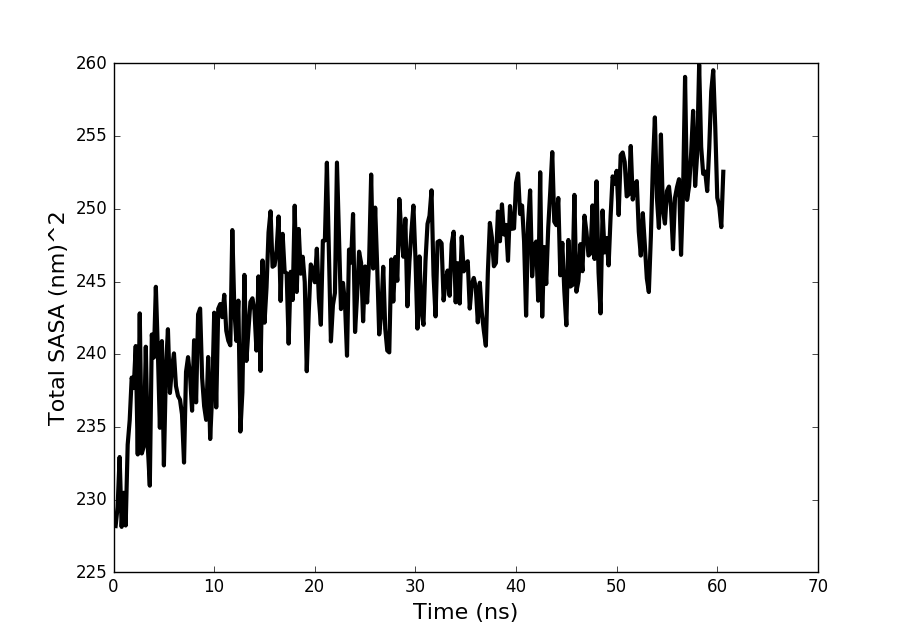

In [13]:
plt.clf()
time = (np.arange(len(total_sasa_4r))+1)*100000*0.002/1000     # Time in nanoseconds: 'nsteps_per_frame*time_step(ps)/num_ps_in_ns
plt.plot(time,total_sasa_4r,color='k',linewidth=3)
#plt.xlim((0,200))
plt.xlabel('Time (ns)',size=16)
plt.ylabel('Total SASA (nm)^2', size=16)
#plt.grid()
#plt.figure(dpi=300)
plt.savefig("SASA_4r_explicit.png", format='png')
Image("SASA_4r_explicit.png")

Nanoparticle still expanding at the end of simulations. This indicates the apparantly equilibrated structure from implicit solvent nanoparticle formation is more compact than it would be in explicit solvent.

# Histogram of radial structure of dye

## Molecule 4r (rapamycin)

In [14]:
folder = '/Users/rossg/Work/nanoparticles/NewExplicit/Production/4r/'
traj_4r = md.load(folder+'traj_centered.dcd',top=folder+'equil.pdb')

In [15]:
mols = ['LIG','DYE']
nanoids = [atms.index for atms in traj_4r.topology.atoms if atms.residue.name in mols]
dyeids = [atms.index for atms in traj_4r.topology.atoms if atms.residue.name == 'DYE']
ligids = [atms.index for atms in traj_4r.topology.atoms if atms.residue.name == 'LIG']

Locate the centre of nanoparticle and get the distance of all the atoms from center

In [16]:
frame = 0
center = traj_4r.xyz[frame][nanoids,:].mean(axis=0)

dist_dye = []
dist_lig = []
for frame in range(traj_4r.n_frames):
    for ind in dyeids:
        dist_dye.append(((center - traj_4r.xyz[frame][ind,:])**2).sum()) 
    for ind in ligids:
        dist_lig.append(((center - traj_4r.xyz[frame][ind,:])**2).sum())         

In [17]:
edges = np.arange(0,18,2)
midpoints = edges[0:len(edges)-1] + np.diff(edges)/2
#print midpoints,edges

cnts_dye,bins = np.histogram(dist_dye,edges)
cnts_dye = 1.0*cnts_dye/np.sum(cnts_dye)
cnts_lig,bins = np.histogram(dist_lig,edges)
cnts_lig = 1.0*cnts_lig/np.sum(cnts_lig)

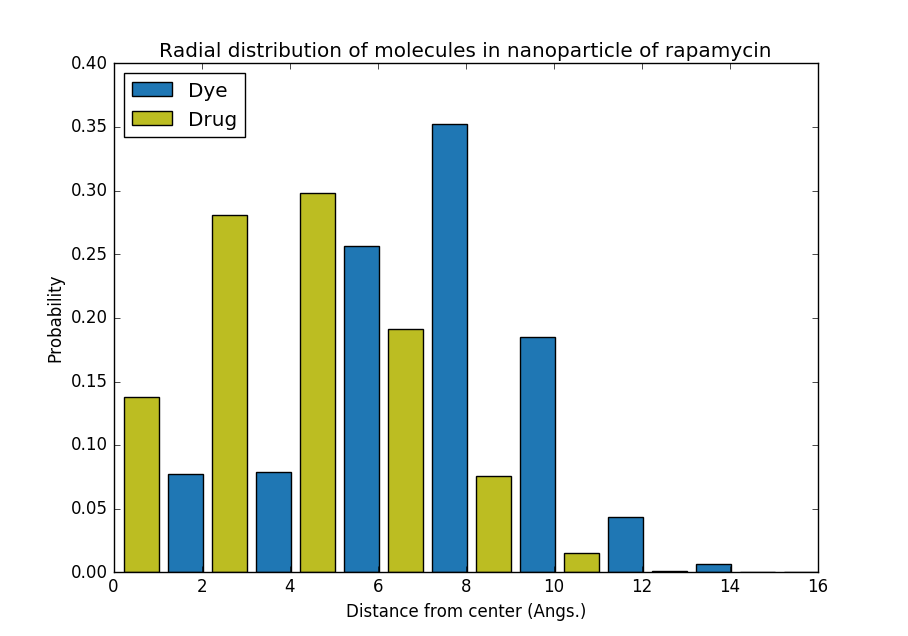

In [18]:
plt.clf()
plt.bar(midpoints+0.23,cnts_dye,color=tableau4[0])
plt.bar(midpoints-0.77,cnts_lig,color=tableau4[-1])
#plt.grid()
plt.xlim((0,16))
plt.ylabel('Probability')
plt.xlabel('Distance from center (Angs.)')
plt.title('Radial distribution of molecules in nanoparticle of rapamycin')
plt.legend(('Dye','Drug'),loc='upper left')
plt.savefig('4r_explicit_RadialProfile.png',format='png')
Image('4r_explicit_RadialProfile.png')

## Molecule 10v (valrubicin)

In [19]:
folder = '/Users/rossg/Work/nanoparticles/NewExplicit/Production/10v/'
traj_10v = md.load(folder+'traj_centered.dcd',top=folder+'equil.pdb')

In [20]:
mols = ['LIG','DYE']
nanoids = [atms.index for atms in traj_10v.topology.atoms if atms.residue.name in mols]
dyeids = [atms.index for atms in traj_10v.topology.atoms if atms.residue.name == 'DYE']
ligids = [atms.index for atms in traj_10v.topology.atoms if atms.residue.name == 'LIG']

Get the distance form center of drug and dye

In [21]:
frame = 0
center = traj_10v.xyz[frame][nanoids,:].mean(axis=0)

dist_dye = []
dist_lig = []
for frame in range(traj_10v.n_frames):
    for ind in dyeids:
        dist_dye.append(((center - traj_10v.xyz[frame][ind,:])**2).sum()) 
    for ind in ligids:
        dist_lig.append(((center - traj_10v.xyz[frame][ind,:])**2).sum())         

Create the histogram

In [22]:
edges = np.arange(0,18,2)
midpoints = edges[0:len(edges)-1] + np.diff(edges)/2

cnts_dye,bins = np.histogram(dist_dye,edges)
cnts_dye = 1.0*cnts_dye/np.sum(cnts_dye)
cnts_lig,bins = np.histogram(dist_lig,edges)
cnts_lig = 1.0*cnts_lig/np.sum(cnts_lig)

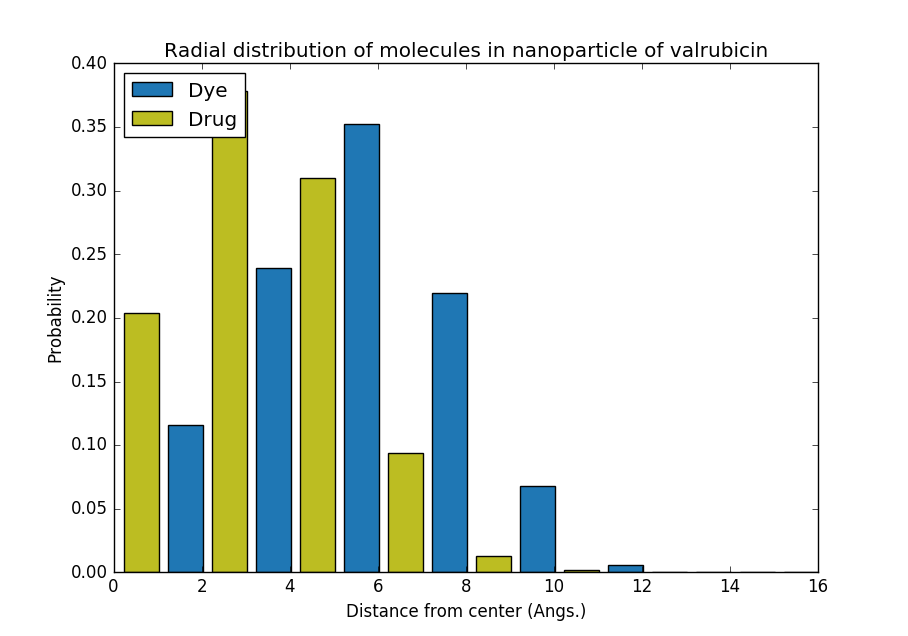

In [23]:
plt.clf()
plt.bar(midpoints+0.23,cnts_dye,color=tableau4[0])
plt.bar(midpoints-0.77,cnts_lig,color=tableau4[-1])
#plt.grid()
plt.xlim((0,16))
plt.ylabel('Probability')
plt.xlabel('Distance from center (Angs.)')
plt.title('Radial distribution of molecules in nanoparticle of valrubicin')
plt.legend(('Dye','Drug'),loc='upper left')
plt.savefig('10v_explicit_RadialProfile.png',format='png')
Image('10v_explicit_RadialProfile.png')